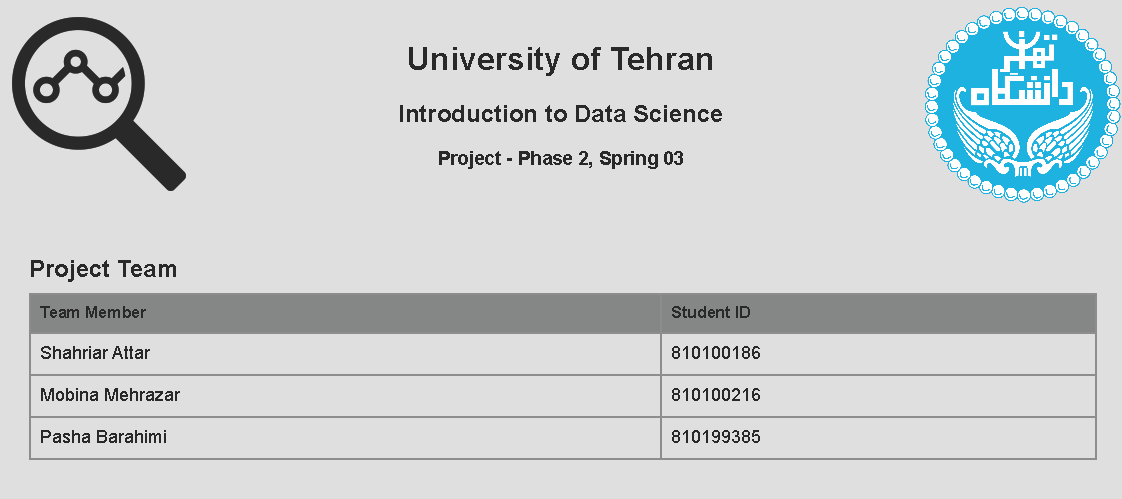

# Project - Phase 2 - Regression Analysis

## Introduction

The dataset contains information about car features and their selling price in South Africa. The objective is to predict the selling price of the cars based on the features provided.

## Objectives

The purpose of this phase is as follows:

1. To build a machine learning model that predicts the selling price of the cars based on the features provided.

## Tasks

- Preprocessing (if necessary)
- Feature Engineering and Selection
- Dimensionality Reduction
- Defining Evaluation Metrics
- Model Training Using 3 Different Models
- Feature Analysis
- Overall Report and Discussions

## Environment Setup

We'll begin by setting up your Python environment and installing the necessary libraries.

In [133]:
import warnings

from typing import Union, Optional, Type

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm import tqdm

import tabulate

from colorama import Fore

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, LearningRateScheduler

In [2]:
warnings.filterwarnings('ignore')

In [68]:
PROCESSED_DATA_PATH = "../data/cars_processed.csv"

TRAIN_SIZE = 0.8
VALIDATION_SIZE = 0.1
RANDOM_STATE = 42

## Steps

### Loading the Data

In [4]:
df = pd.read_csv(PROCESSED_DATA_PATH)
df

,Age,Body Type_Bus,Body Type_Cabriolet,Body Type_Coupe,Body Type_Crossover (SUV),Body Type_Hatchback,Body Type_Multi Purpose Vehicle,Body Type_Other,Body Type_Sedan,Body Type_Sports Utility Vehicle (SUV),...,Mileage,No of Cylinders,No of Doors,No of Seats,Remaining Maintenance Plan,Remaining Warranty,Spare Key,Transmission,Vehicle Service History,Price
0,5,False,False,False,False,False,True,False,False,False,...,125000,4,5,7,0,0,False,0,3,767900
1,5,False,False,False,False,False,False,False,False,True,...,65871,4,5,5,0,0,False,0,0,767900
2,9,False,False,False,False,False,False,False,False,True,...,142000,6,5,7,0,0,False,0,3,766900
3,4,False,False,False,False,False,False,False,False,True,...,59000,4,5,5,367,367,True,0,0,765900
4,5,False,False,False,False,False,False,False,False,True,...,86000,6,5,4,0,0,True,0,0,764900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,16,False,False,False,False,True,False,False,False,False,...,209000,4,5,4,0,0,False,1,4,29900
4970,19,False,False,False,False,True,False,False,False,False,...,211000,4,3,4,0,0,False,1,4,38900
4971,20,False,False,False,False,True,False,False,False,False,...,310165,4,5,5,0,0,False,1,4,29900
4972,19,False,False,False,False,False,False,False,True,False,...,150788,4,4,5,0,0,False,0,4,25900


### Preprocessing

In the previous section (EDA), we were asked to perform various data preprocessing operations as needed in the data analysis stages. In this section, we'll perform these operations with a machine learning algorithms approach **(Note: if we have already completed the following steps in the previous phase, there is no need to repeat them here).**

**We should explain our reasons for choosing the steps we took in preprocessing.**

Most of the preprocessing steps are done in the previous phase. However, there are some additional steps that we need to take in this phase.

#### Converting Boolean Features to Binary

In [5]:
bool_features = df.select_dtypes(include=[bool]).columns
for col in bool_features:
    df[col] = df[col].astype(int)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4974 entries, 0 to 4973
Data columns (total 49 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Age                                     4974 non-null   int64  
 1   Body Type_Bus                           4974 non-null   int32  
 2   Body Type_Cabriolet                     4974 non-null   int32  
 3   Body Type_Coupe                         4974 non-null   int32  
 4   Body Type_Crossover (SUV)               4974 non-null   int32  
 5   Body Type_Hatchback                     4974 non-null   int32  
 6   Body Type_Multi Purpose Vehicle         4974 non-null   int32  
 7   Body Type_Other                         4974 non-null   int32  
 8   Body Type_Sedan                         4974 non-null   int32  
 9   Body Type_Sports Utility Vehicle (SUV)  4974 non-null   int32  
 10  Body Type_Station Wagon                 4974 non-null   int3

#### Splitting the Data into Features and Target

In [7]:
X = df.drop(columns=["Price", "Finance Price"])
y = df[["Price"]]

#### Scaling the Features

In [8]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,Age,Body Type_Bus,Body Type_Cabriolet,Body Type_Coupe,Body Type_Crossover (SUV),Body Type_Hatchback,Body Type_Multi Purpose Vehicle,Body Type_Other,Body Type_Sedan,Body Type_Sports Utility Vehicle (SUV),...,Make Model,Mileage,No of Cylinders,No of Doors,No of Seats,Remaining Maintenance Plan,Remaining Warranty,Spare Key,Transmission,Vehicle Service History
0,0.20,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.608696,0.368006,0.333333,0.666667,0.8,0.000000,0.00000,0.0,0.0,0.75
1,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.478261,0.191736,0.333333,0.666667,0.4,0.000000,0.00000,0.0,0.0,0.00
2,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.608696,0.418684,1.000000,0.666667,0.8,0.000000,0.00000,0.0,0.0,0.75
3,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.459627,0.171253,0.333333,0.666667,0.4,0.824719,0.51257,1.0,0.0,0.00
4,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.124224,0.251742,1.000000,0.666667,0.2,0.000000,0.00000,1.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4969,0.75,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.428571,0.618418,0.333333,0.666667,0.2,0.000000,0.00000,0.0,1.0,1.00
4970,0.90,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.006211,0.624381,0.333333,0.000000,0.2,0.000000,0.00000,0.0,1.0,1.00
4971,0.95,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.900621,0.920002,0.333333,0.666667,0.4,0.000000,0.00000,0.0,1.0,1.00
4972,0.90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.434783,0.444882,0.333333,0.333333,0.4,0.000000,0.00000,0.0,0.0,1.00


#### Scaling the Target

As the target variable is the price of the cars and it contains a wide range of values, we need to scale it to make the training process easier for the model.

In [9]:
y_scaler = MinMaxScaler()
y_scaled = y_scaler.fit_transform(y)
y = pd.DataFrame(y_scaled, columns=y.columns)
y

,Price
0,0.971576
1,0.971576
2,0.970284
3,0.968992
4,0.967700
...,...
4969,0.018088
4970,0.029716
4971,0.018088
4972,0.012920


### Feature Engineering and Selection

Based on the nature of our data, we'll apply specific feature engineering techniques to enhance the quality of our features. We may change these techniques after we check the performance of our models, to improve the metrics. Also, we may decide to select only specific features among all of our features for the next steps.

**We should explain our criterion and the reasons for the techniques we used in feature engineering and selection.**

We'll use the Profile Report shown in the previous phase to guide us in this step.

#### Constants

##### Body Type_Cabriolet

As the report shows, this feature is constant and has no predictive power. We'll drop this feature.

In [10]:
X_scaled.value_counts("Body Type_Cabriolet")

Body Type_Cabriolet
0.0    4974
Name: count, dtype: int64

#### Correlation

Let's plot the correlation matrix for the features that have warning signs in the report.

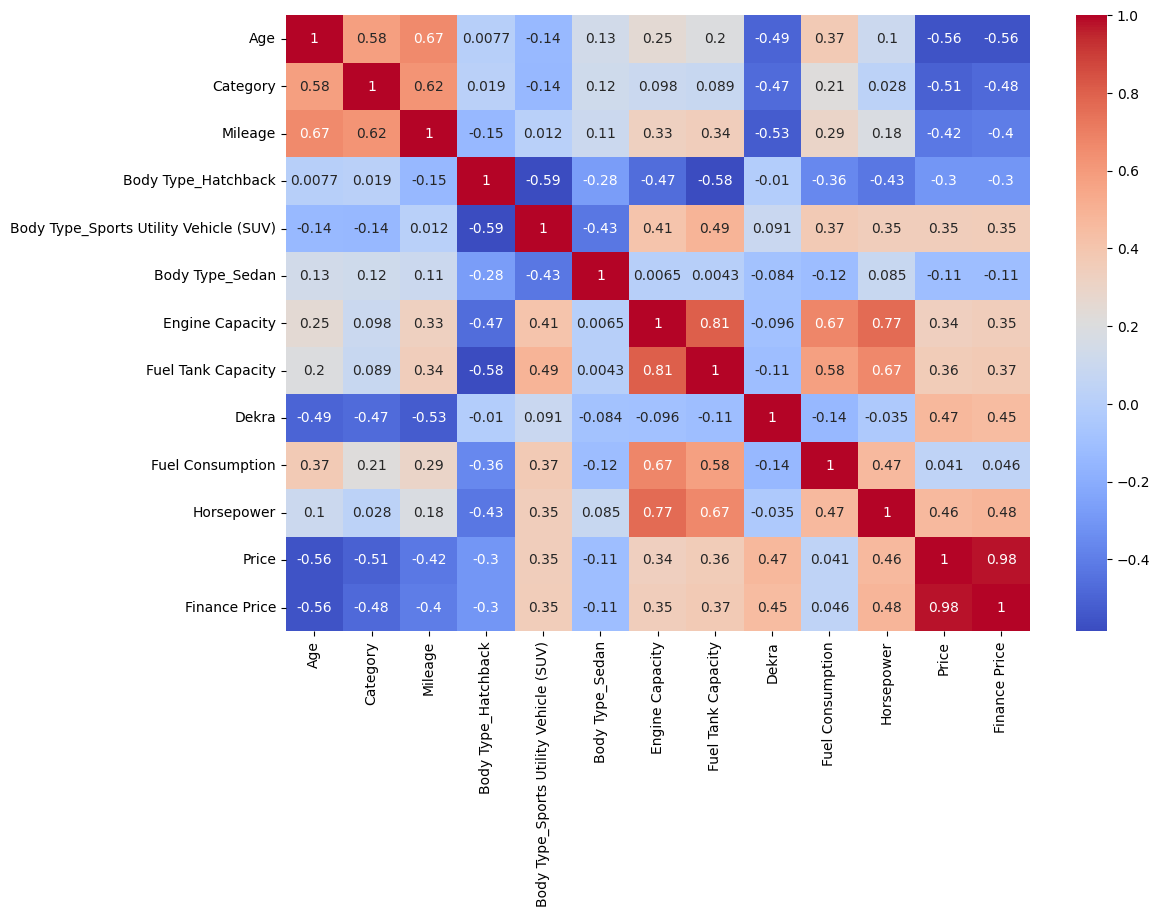

In [11]:
cols = ["Age", "Category", "Mileage", "Body Type_Hatchback", "Body Type_Sports Utility Vehicle (SUV)",
        "Body Type_Sedan", "Engine Capacity", "Fuel Tank Capacity", "Dekra", "Fuel Consumption", "Horsepower"]

df_temp = X_scaled[cols]
df_temp["Price"] = df["Price"]
df_temp["Finance Price"] = df["Finance Price"]
corr = df_temp.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

##### Fuel Consumption

This feature has a low correlation with the target variable and has a high correlation with the other features. We'll drop this feature.

In [12]:
X_scaled = X_scaled.drop(columns=["Fuel Consumption"])

### Dimensionality Reduction

Using the PCA method, we'll reduce the dimensions of numerical features to two dimensions. How much of the initial data variance is transferred to the new space? If we aim to retain 95% of the original variance, what is the minimum number of dimensions required in the new space? **We'll save both the original data and the dimension-reduced one for the next parts.**

In [13]:
X_scaled.shape[1]

46

#### Two Dimensions

In [14]:
pca = PCA(n_components=2, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)
print(f"Explained variance: {pca.explained_variance_ratio_.sum()}")

Explained variance: 0.31822174351036214


#### 95% Variance

In [15]:
pca = PCA(n_components=0.95, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X_scaled)
print(f"Number of components: {pca.n_components_}")
print(f"Explained variance: {pca.explained_variance_ratio_.sum()}")

Number of components: 23
Explained variance: 0.9547952323259957


As we can see, we can use half of the features to retain 95% of the variance.

In [16]:
X_pca = pd.DataFrame(X_pca, columns=[f"PC{i}" for i in range(1, pca.n_components_ + 1)])
X_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4974 entries, 0 to 4973
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     4974 non-null   float64
 1   PC2     4974 non-null   float64
 2   PC3     4974 non-null   float64
 3   PC4     4974 non-null   float64
 4   PC5     4974 non-null   float64
 5   PC6     4974 non-null   float64
 6   PC7     4974 non-null   float64
 7   PC8     4974 non-null   float64
 8   PC9     4974 non-null   float64
 9   PC10    4974 non-null   float64
 10  PC11    4974 non-null   float64
 11  PC12    4974 non-null   float64
 12  PC13    4974 non-null   float64
 13  PC14    4974 non-null   float64
 14  PC15    4974 non-null   float64
 15  PC16    4974 non-null   float64
 16  PC17    4974 non-null   float64
 17  PC18    4974 non-null   float64
 18  PC19    4974 non-null   float64
 19  PC20    4974 non-null   float64
 20  PC21    4974 non-null   float64
 21  PC22    4974 non-null   float64
 22  

### Evaluation Metrics

We will choose appropriate evaluation metrics based on the nature of the data and the project goal, and explain our reasons for choosing them.

As our problem is a regression problem, we'll use the following metrics:

- Mean Squared Error (MSE)
- R-squared (R2)

These metrics are calculated using `sklearn.metrics`.

### Model Training

In this section, we need to implement three methods to predict our target variable. First, we'll split the initial data (including all features) into training and test sets.

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)
X_pca_train, X_pca_test, y_train, y_test = train_test_split(X_pca, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

X_train_grid, X_val, y_train_grid, y_val = train_test_split(X_train, y_train, test_size=VALIDATION_SIZE, random_state=RANDOM_STATE)
X_pca_train_grid, X_pca_val, y_train_grid, y_val = train_test_split(X_pca_train, y_train, test_size=VALIDATION_SIZE, random_state=RANDOM_STATE)

In [18]:
X_train.shape, X_test.shape

((3979, 46), (995, 46))

In [19]:
X_pca_train.shape, X_pca_test.shape

((3979, 23), (995, 23))

In [70]:
X_train_grid.shape, X_val.shape

((3581, 46), (398, 46))

In [71]:
X_pca_train_grid.shape, X_pca_val.shape

((3581, 23), (398, 23))

In [20]:
class RegressionResults:
    def __init__(self, y_true: np.ndarray, y_pred: np.ndarray, is_train: bool = True):
        self.y_true = y_true
        self.y_pred = y_pred
        self.mse = mean_squared_error(y_true, y_pred)
        self.r2 = r2_score(y_true, y_pred)
        self.is_train = is_train

    def __str__(self):
        return f"MSE: {self.mse:.3f}, R2: {self.r2:.3f}"

    def __repr__(self):
        return self.__str__()

In [36]:
class RegressionModel:
    def __init__(self,
                 model: Union[SVR, LinearRegression, RandomForestRegressor, GradientBoostingRegressor, KNeighborsRegressor, DecisionTreeRegressor, keras.Model],
                 X_train: np.ndarray,
                 y_train: np.ndarray,
                 X_test: np.ndarray,
                 y_test: np.ndarray,
                 name: str):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.name = name
        self.train_results = None
        self.test_results = None

    def fit(self) -> None:
        self.model.fit(self.X_train, self.y_train)

    def predict(self) -> None:
        y_train_pred = self.model.predict(self.X_train)
        y_test_pred = self.model.predict(self.X_test)
        self.y_train_pred = y_train_pred.reshape(-1, 1)
        self.y_test_pred = y_test_pred.reshape(-1, 1)
        self.train_results = RegressionResults(self.y_train, y_train_pred)
        self.test_results = RegressionResults(self.y_test, y_test_pred)

    def fit_and_predict(self) -> None:
        self.fit()
        self.predict()

    def reverse_scale(self, scaler: MinMaxScaler) -> None:
        self.y_train = scaler.inverse_transform(self.y_train)
        self.y_test = scaler.inverse_transform(self.y_test)
        self.y_train_pred = scaler.inverse_transform(self.y_train_pred)
        self.y_test_pred = scaler.inverse_transform(self.y_test_pred)

    def __str__(self):
        return f"{self.name}:\n\tTrain: {self.train_results}\n\tTest: {self.test_results}"

    def __repr__(self):
        return self.__str__()

    def plot(self) -> None:
        _, ax = plt.subplots(1, 2, figsize=(12, 6))
        ax[0].scatter(self.y_train, self.y_train_pred)
        ax[0].set_title(f"{self.name} Train")
        ax[1].scatter(self.y_test, self.y_test_pred)
        ax[1].set_title(f"{self.name} Test")
        for a in ax:
            a.set_xlabel("True")
            a.set_ylabel("Predicted")
            a.plot([0, 1], [0, 1], transform=a.transAxes, ls="--", c="red")
            for label in a.get_xticklabels():
                label.set_rotation(45)
        plt.show()

For each model, we will use the scaled target to increase the performance of the model. Then, we'll use the `inverse_transform` method to get the original values before plotting the results. This will increase the error as the range of the target variable is wide. However, the R2 score will not be affected by this transformation.

In [30]:
class NNRegressionModel(RegressionModel):
    def __init__(self, model: keras.Model, X_train: np.ndarray, y_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray, name: str):
        super().__init__(model, X_train, y_train, X_test, y_test, name)
        self.history = None

    def fit(self, epochs: int, batch_size: int, validation_split: float, lr_scheduler: Optional[LearningRateScheduler], verbose: int = 0) -> None:
        history = self.model.fit(self.X_train, self.y_train, epochs=epochs, batch_size=batch_size, validation_split=validation_split, callbacks=[EarlyStopping(patience=5), lr_scheduler])
        self.history = history

    def predict(self, verbose: int = 0) -> None:
        y_train_pred = self.model.predict(self.X_train, verbose=verbose)
        y_test_pred = self.model.predict(self.X_test, verbose=verbose)
        self.y_train_pred = y_train_pred
        self.y_test_pred = y_test_pred
        self.train_results = RegressionResults(self.y_train, y_train_pred, is_train=True)
        self.test_results = RegressionResults(self.y_test, y_test_pred, is_train=False)

    def fit_and_predict(self,
                        epochs: int = 100,
                        batch_size: int = 32,
                        validation_split: float = 0.2,
                        lr_scheduler: Optional[LearningRateScheduler] = LearningRateScheduler(lambda epoch: 1e-3 * 0.9 ** epoch),
                        verbose: int = 0) -> None:
        self.fit(epochs=epochs, batch_size=batch_size, validation_split=validation_split, lr_scheduler=lr_scheduler, verbose=verbose)
        self.predict(verbose=verbose)

    def plot(self) -> None:
        super().plot()
        plt.figure(figsize=(12, 6))
        plt.plot(self.history.history["loss"], label="train")
        plt.plot(self.history.history["val_loss"], label="validation")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.title(f"{self.name} Loss")
        plt.show()

In [87]:
def find_best_params(model: Type, param_grid: dict, X_train: np.ndarray, y_train: np.ndarray, X_val: np.ndarray, y_val: np.ndarray, plot: bool = True) -> dict:
    best_params = {}
    least_loss = np.inf
    results = {param: {} for param in param_grid.keys()}
    for params in tqdm(ParameterGrid(param_grid)):
        model_instance = model(**params)
        model_instance.fit(X_train, y_train)
        y_pred = model_instance.predict(X_val)
        loss = mean_squared_error(y_val, y_pred)
        score = r2_score(y_val, y_pred)
        if loss < least_loss:
            least_loss = loss
            best_params = params

        for key, val in params.items():
            if val not in results[key]:
                results[key][val] = {"loss": np.inf, "score": -np.inf}
            results[key][val]["loss"] = min(results[key][val]["loss"], loss)
            results[key][val]["score"] = max(results[key][val]["score"], score)

    if plot:
        count = sum([len(values.keys()) > 1 for values in results.values()])
        _, ax = plt.subplots(count, 2, figsize=(12, 6 * count))
        for i, (param, values) in enumerate(results.items()):
            if len(values.keys()) < 2:
                continue
            x = list(values.keys())
            y_loss = [v["loss"] for v in values.values()]
            y_score = [v["score"] for v in values.values()]
            ax[i][0].plot(x, y_loss)
            ax[i][0].set_title(f"{param} Loss")
            ax[i][0].set_xlabel(param)
            ax[i][0].set_ylabel("Loss")
            ax[i][1].plot(x, y_score)
            ax[i][1].set_title(f"{param} R2 Score")
            ax[i][1].set_xlabel(param)
            ax[i][1].set_ylabel("Score")


    return best_params

#### Method One: Neural Network

We'll design and train a neural network for our goal. Then we'll report the following:

- Error plot during training
- Model performance on the test data based on the evaluation metric
- The network architecture, loss function, and optimization algorithm we chose, and explain our reasons for choosing them.

In [23]:
def create_nn_model(input_shape: int, output_shape: int) -> keras.Model:
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(128, activation="relu"),
        Dense(64, activation="relu"),
        Dense(output_shape, activation="relu")
    ])
    adam = Adam(learning_rate=1e-3)
    model.compile(optimizer=adam, loss="mse")
    return model

In [24]:
model = create_nn_model(X_train.shape[1], 1)
nn_model = NNRegressionModel(model, X_train, y_train, X_test, y_test, "Neural Network")
nn_model.fit_and_predict(epochs=30)
nn_model

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0315 - val_loss: 0.0076 - learning_rate: 0.0010
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0069 - val_loss: 0.0059 - learning_rate: 9.0000e-04
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0054 - val_loss: 0.0053 - learning_rate: 8.1000e-04
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 - val_loss: 0.0049 - learning_rate: 7.2900e-04
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0044 - val_loss: 0.0046 - learning_rate: 6.5610e-04
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0037 - val_loss: 0.0046 - learning_rate: 5.9049e-04
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034 - val_loss: 0.0044 - learning_rate: 5.3144e-04
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0033 - val_loss: 0.0041 - learning_rate: 4.7830e-04
Epoch 9/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0027 - val_loss: 0.0043 - lear

Neural Network:
	Train: MSE: 0.002, R2: 0.928
	Test: MSE: 0.004, R2: 0.869

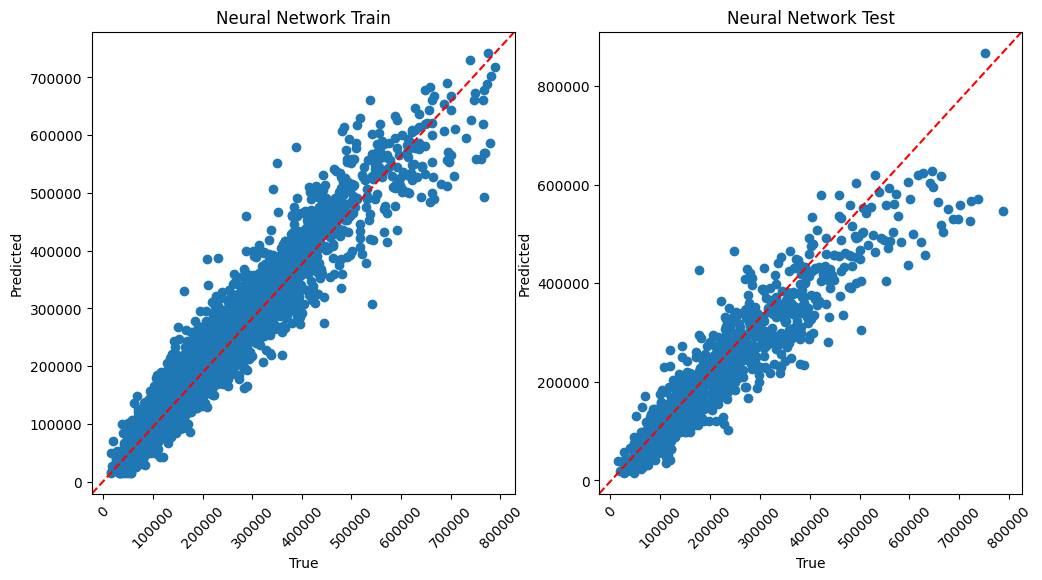

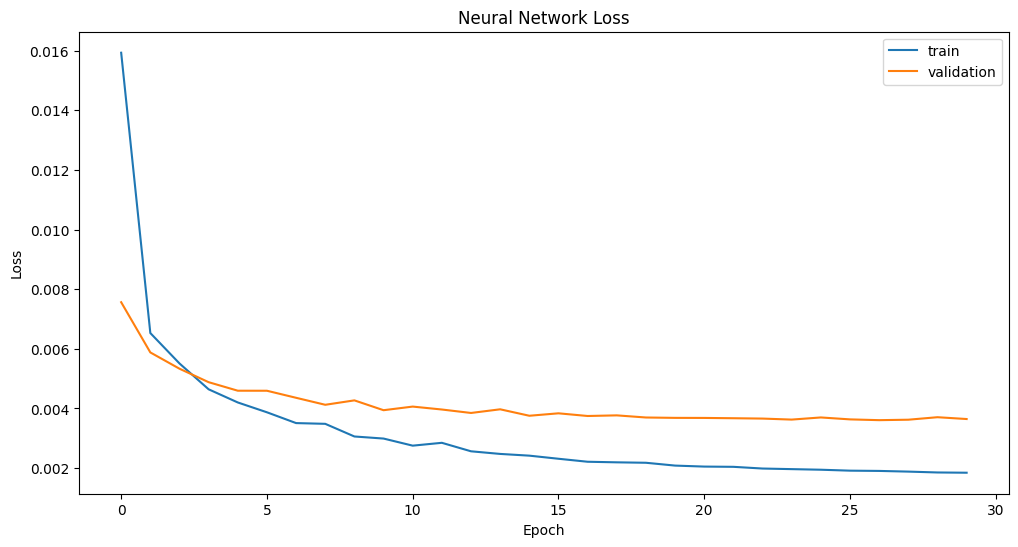

In [25]:
nn_model.reverse_scale(y_scaler)
nn_model.plot()

#### Methods Two & Three

We should choose two methods from the following based on the problem goals and train the models:

<input type="checkbox"> Linear/Logistic Regression<br/>
<input type="checkbox"> SVM<br/>
<input type="checkbox"> Decision Tree<br/>
<input type="checkbox"> KNN<br/>

Then we'll report the following:

- Error plot per parameter
- Model performance on the test data based on the evaluation metric
- Model hyperparameters

##### Linear Regression

This method has no hyperparameters to tune.

In [37]:
lr_model = RegressionModel(LinearRegression(), X_train, y_train, X_test, y_test, "Linear Regression")
lr_model.fit_and_predict()
lr_model

Linear Regression:
	Train: MSE: 0.007, R2: 0.765
	Test: MSE: 0.007, R2: 0.772

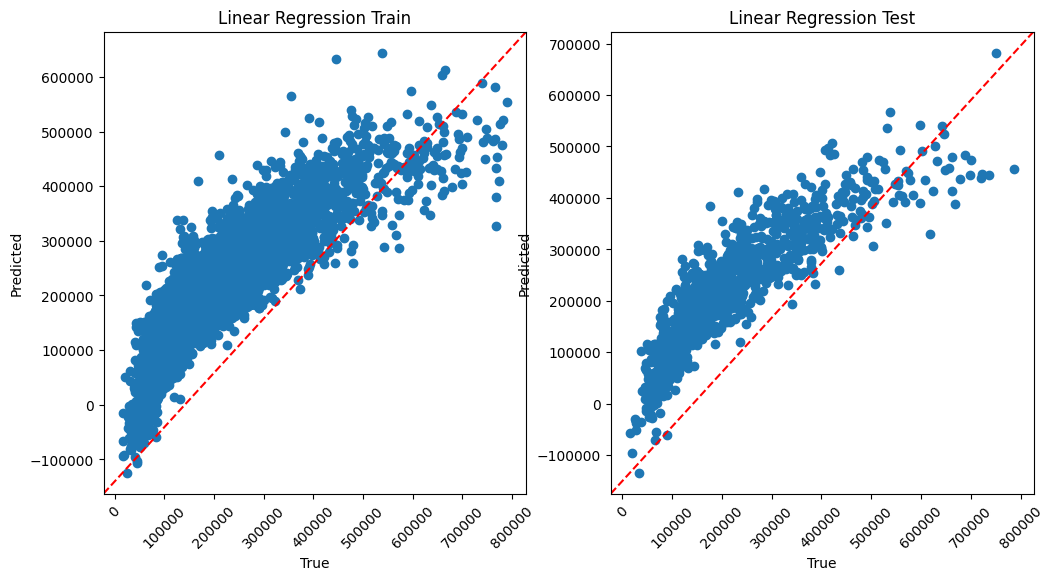

In [38]:
lr_model.reverse_scale(y_scaler)
lr_model.plot()

##### SVM

In [88]:
params = {
    "C": [0.1, 1, 10],
    "epsilon": [0.1, 0.2, 0.3, 0.4, 0.5],
    "kernel": ["linear", "rbf"]
}

100%|██████████| 30/30 [00:04<00:00,  7.12it/s]


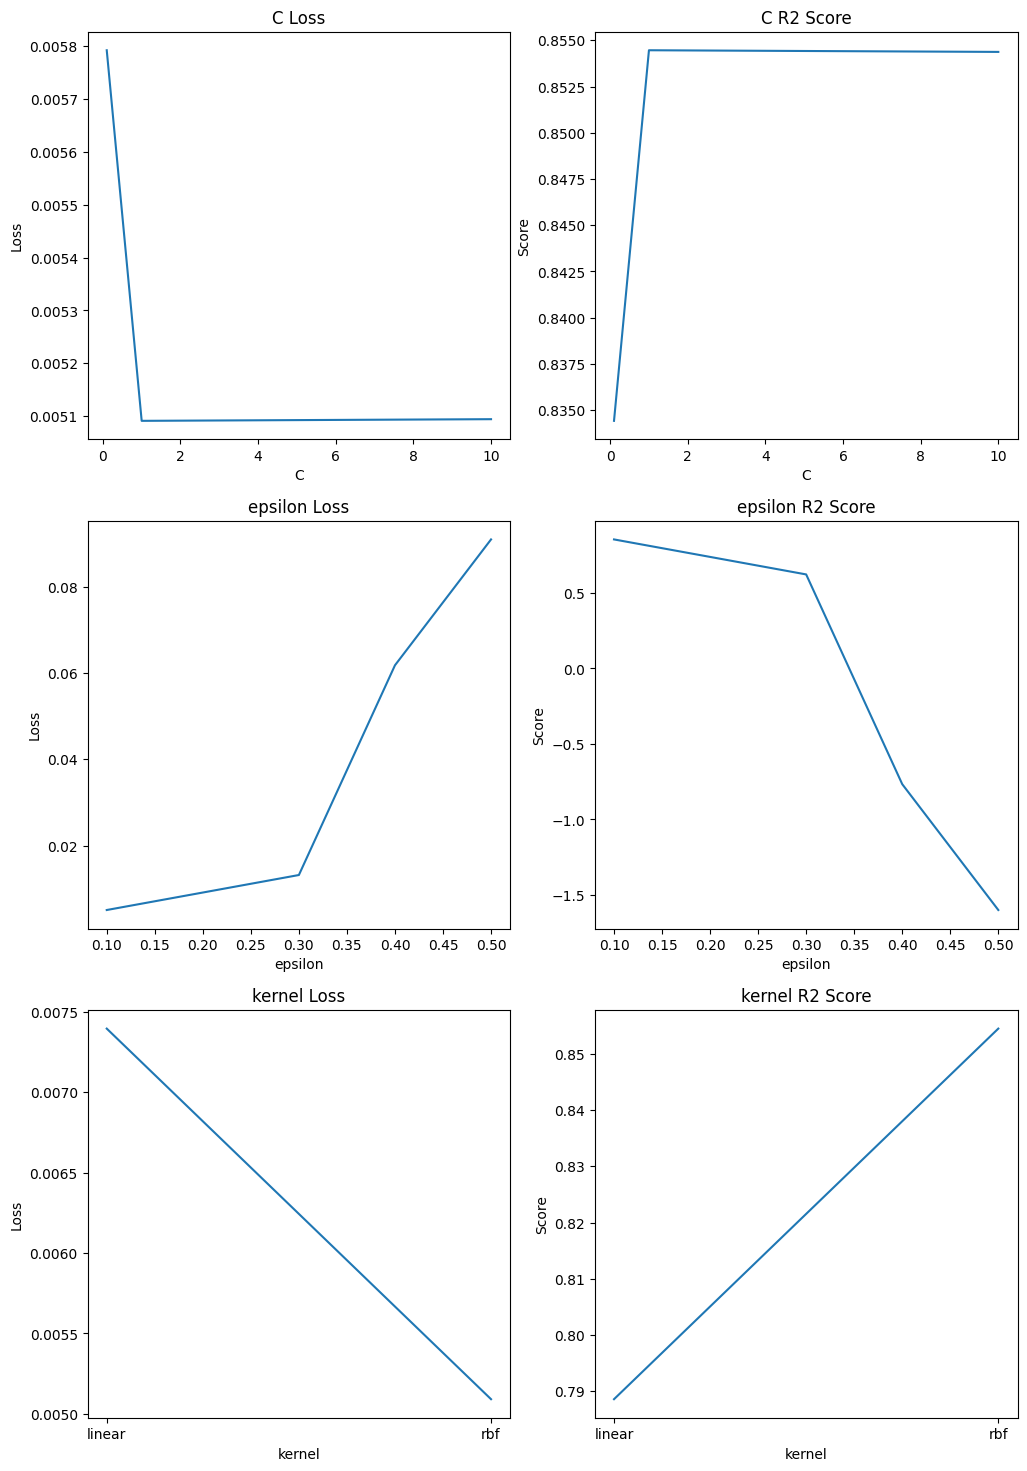

In [89]:
best_params = find_best_params(SVR, params, X_train_grid, y_train_grid, X_val, y_val)

In [90]:
best_params

{'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}

In [91]:
svm_model = RegressionModel(SVR(**best_params), X_train, y_train, X_test, y_test, "SVM")
svm_model.fit_and_predict()
svm_model

SVM:
	Train: MSE: 0.003, R2: 0.892
	Test: MSE: 0.005, R2: 0.860

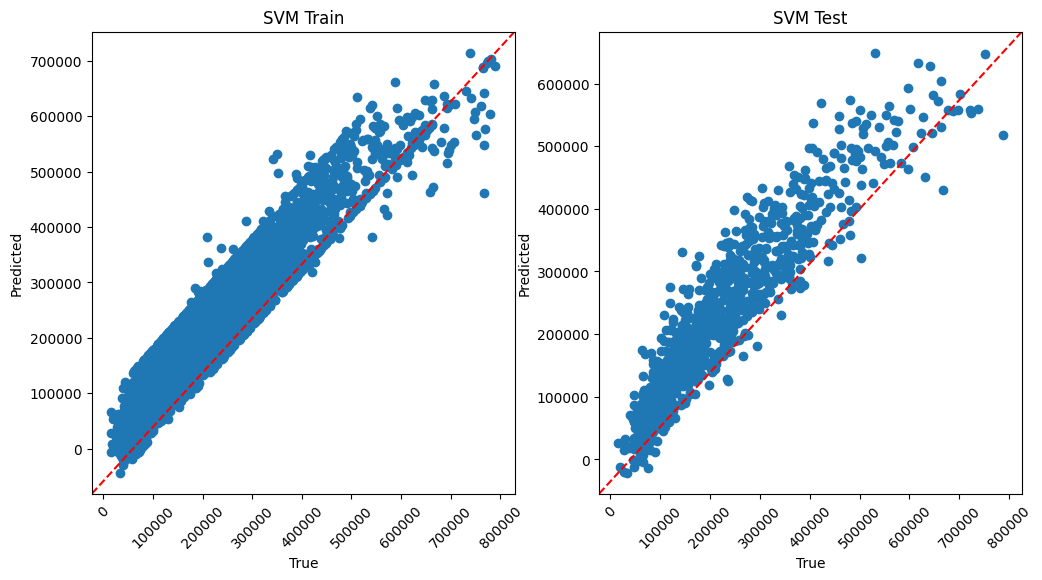

In [92]:
svm_model.reverse_scale(y_scaler)
svm_model.plot()

##### Random Forest

In [98]:
params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 4, 6, 8],
    "random_state": [RANDOM_STATE]
}

100%|██████████| 60/60 [01:14<00:00,  1.24s/it]


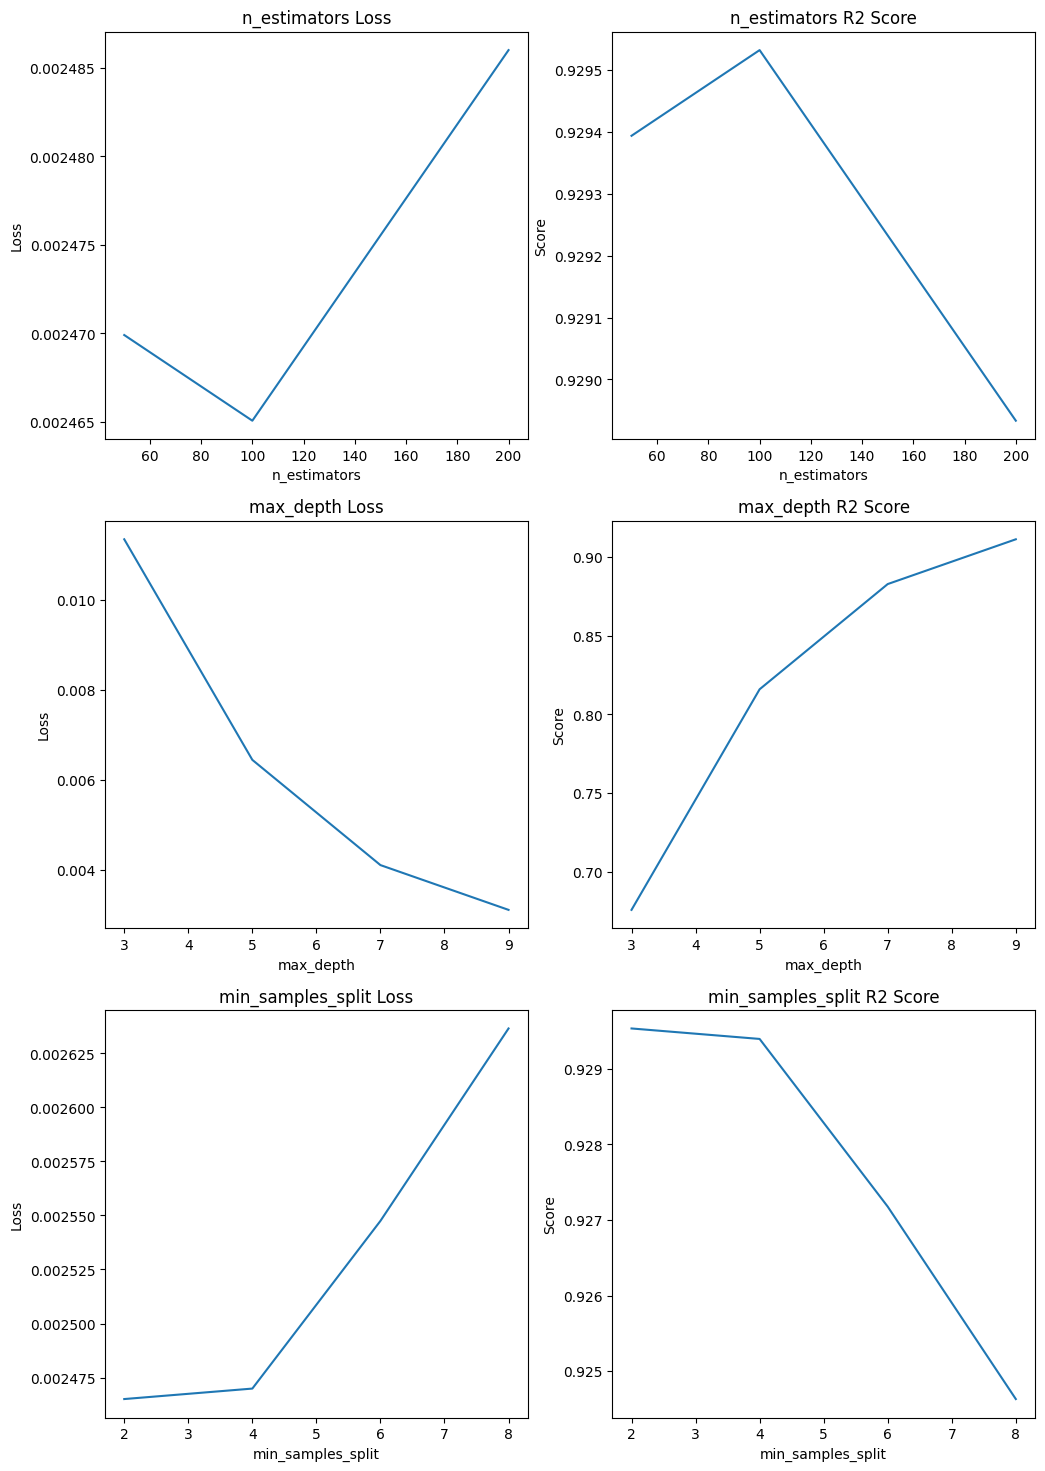

In [99]:
best_params = find_best_params(RandomForestRegressor, params, X_train_grid, y_train_grid, X_val, y_val)

In [100]:
best_params

{'max_depth': None,
 'min_samples_split': 2,
 'n_estimators': 100,
 'random_state': 42}

In [101]:
rf_model = RegressionModel(RandomForestRegressor(**best_params), X_train, y_train, X_test, y_test, "Random Forest")
rf_model.fit_and_predict()
rf_model

Random Forest:
	Train: MSE: 0.000, R2: 0.988
	Test: MSE: 0.003, R2: 0.912

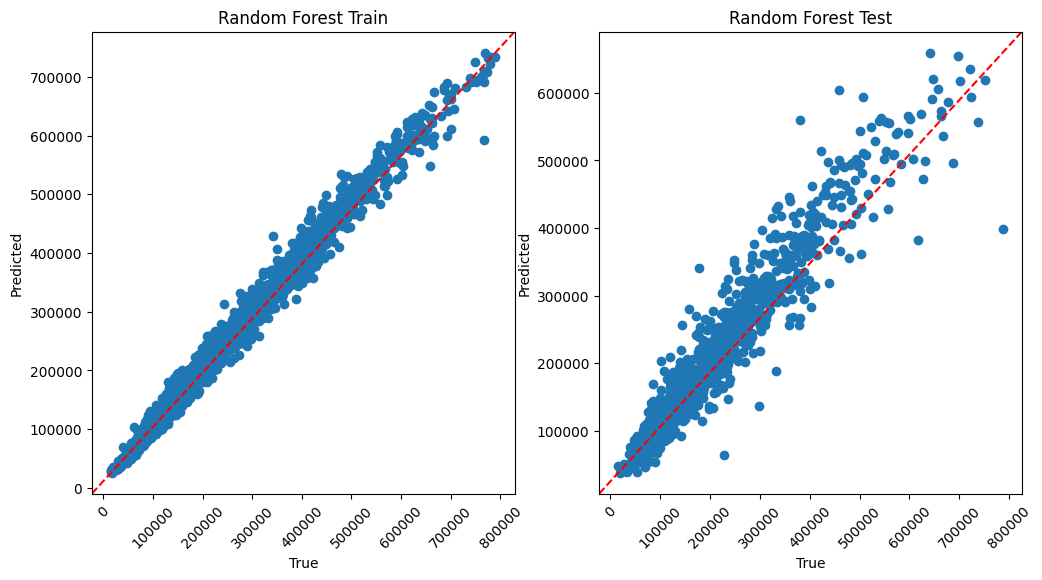

In [102]:
rf_model.reverse_scale(y_scaler)
rf_model.plot()

##### Gradient Boosting

In [103]:
params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 4, 6, 8],
    "random_state": [RANDOM_STATE]
}

100%|██████████| 60/60 [01:50<00:00,  1.84s/it]


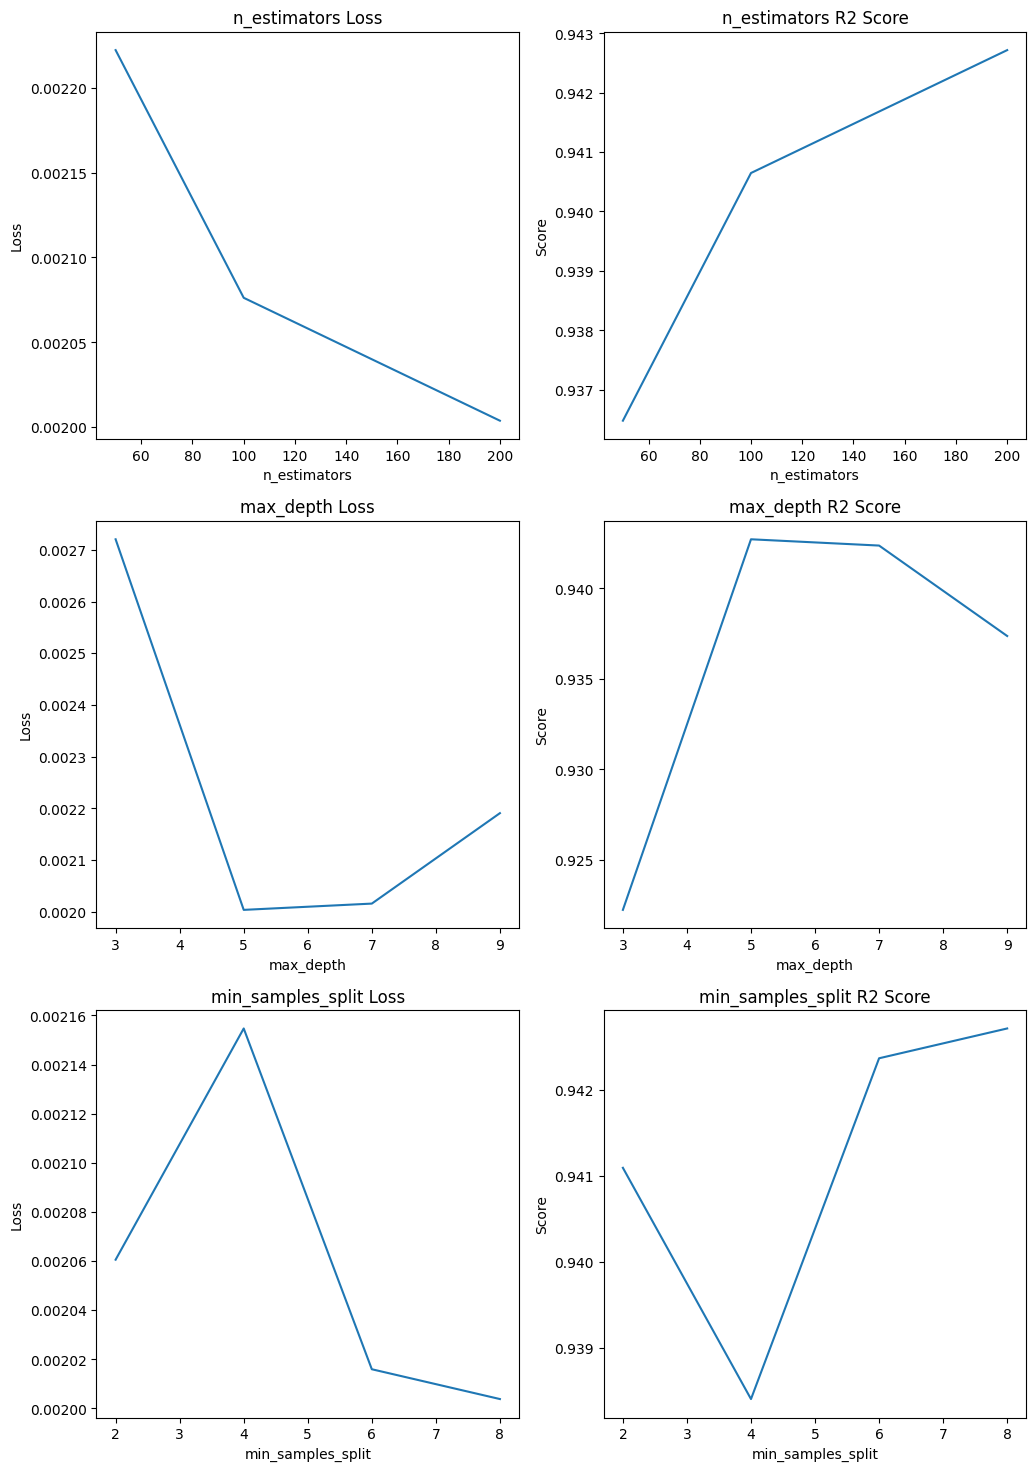

In [104]:
best_params = find_best_params(GradientBoostingRegressor, params, X_train_grid, y_train_grid, X_val, y_val)

In [105]:
best_params

{'max_depth': 5,
 'min_samples_split': 8,
 'n_estimators': 200,
 'random_state': 42}

In [106]:
gb_model = RegressionModel(GradientBoostingRegressor(**best_params), X_train, y_train, X_test, y_test, "Gradient Boosting")
gb_model.fit_and_predict()
gb_model

Gradient Boosting:
	Train: MSE: 0.001, R2: 0.980
	Test: MSE: 0.002, R2: 0.932

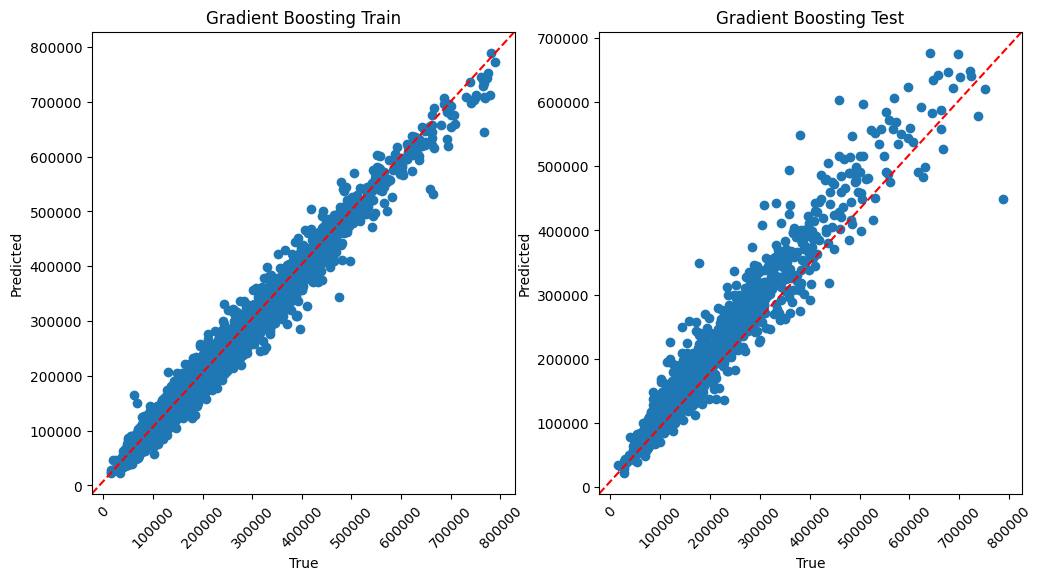

In [107]:
gb_model.reverse_scale(y_scaler)
gb_model.plot()

##### KNN

In [108]:
params = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
}

100%|██████████| 32/32 [00:02<00:00, 13.05it/s]


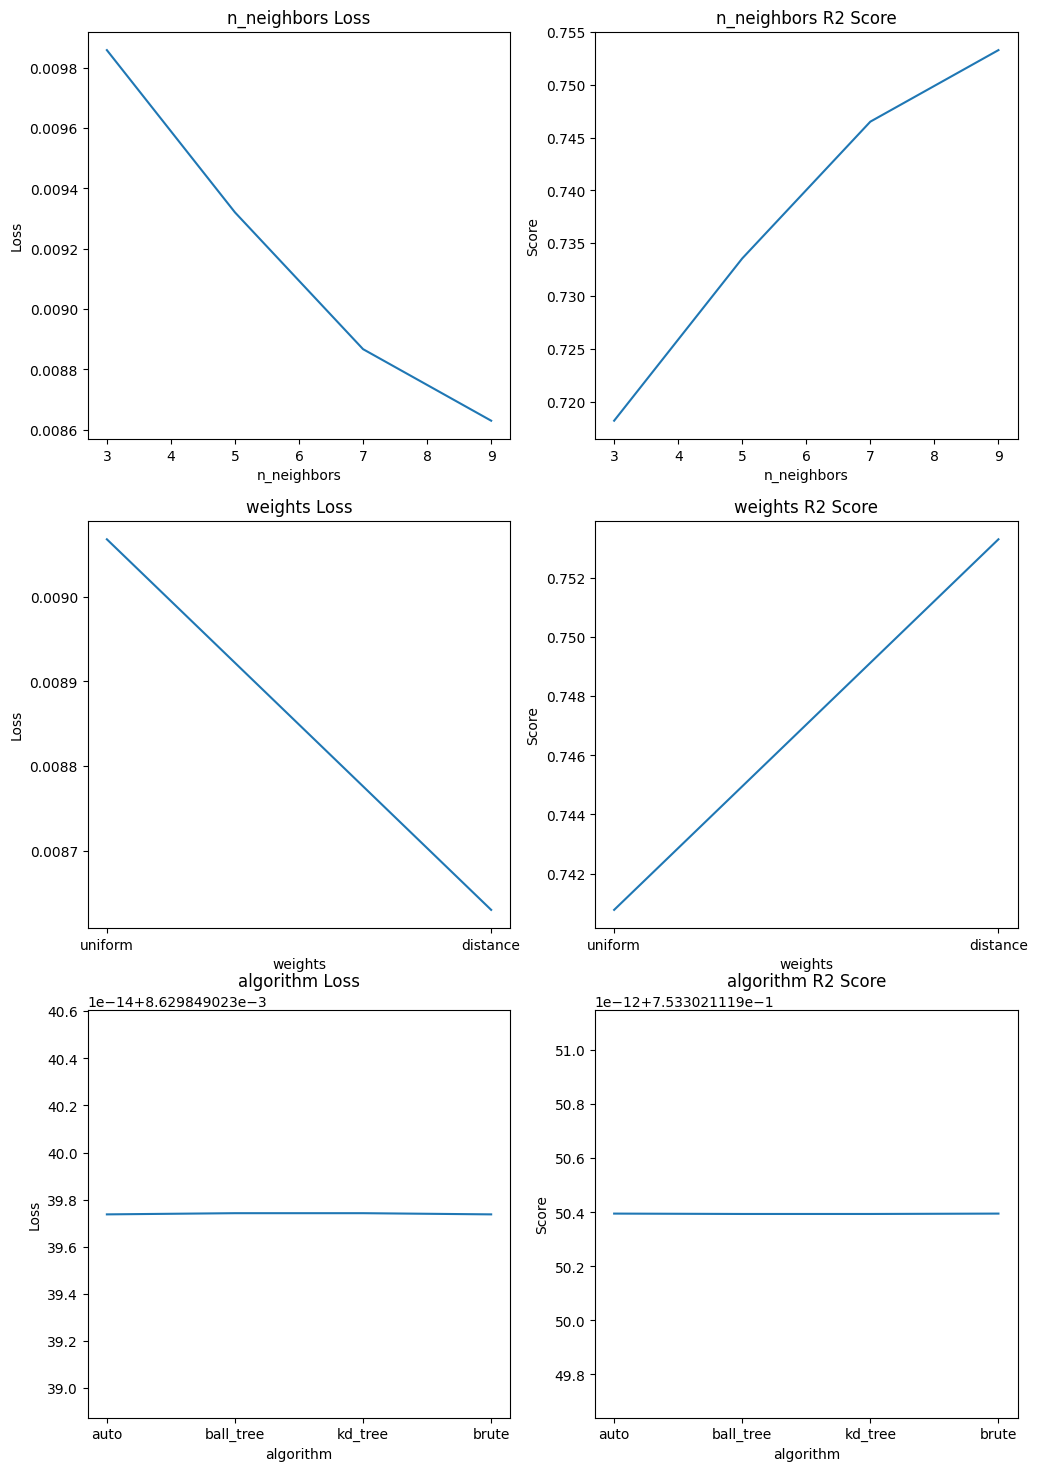

In [109]:
best_params = find_best_params(KNeighborsRegressor, params, X_train_grid, y_train_grid, X_val, y_val)

In [110]:
best_params

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}

In [112]:
knn_model = RegressionModel(KNeighborsRegressor(**best_params), X_train, y_train, X_test, y_test, "KNN")
knn_model.fit_and_predict()
knn_model

KNN:
	Train: MSE: 0.000, R2: 1.000
	Test: MSE: 0.009, R2: 0.713

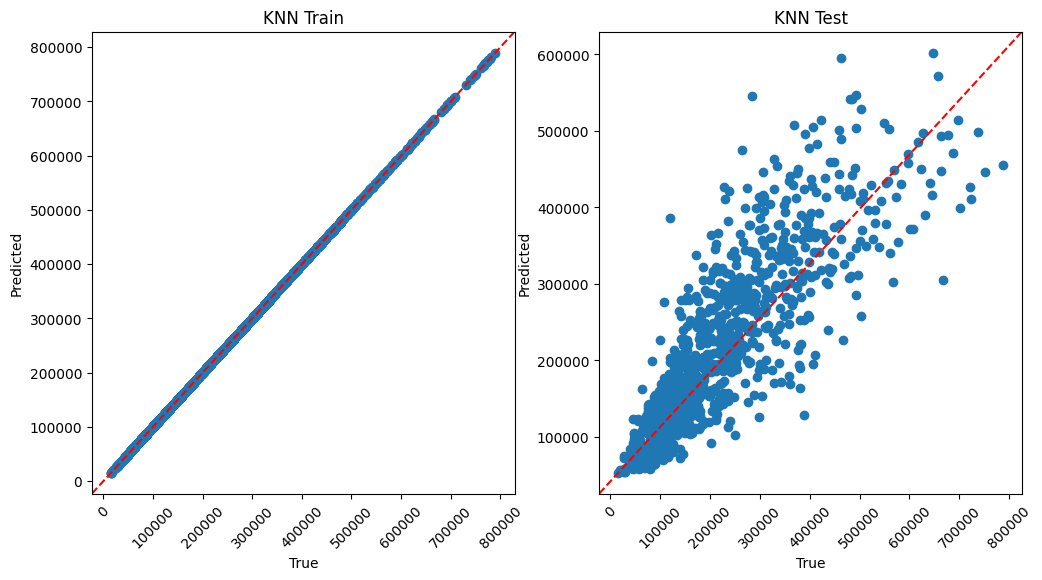

In [113]:
knn_model.reverse_scale(y_scaler)
knn_model.plot()

##### Decision Tree

In [114]:
params = {
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 4, 6, 8],
    "random_state": [RANDOM_STATE]
}

100%|██████████| 20/20 [00:00<00:00, 49.75it/s]


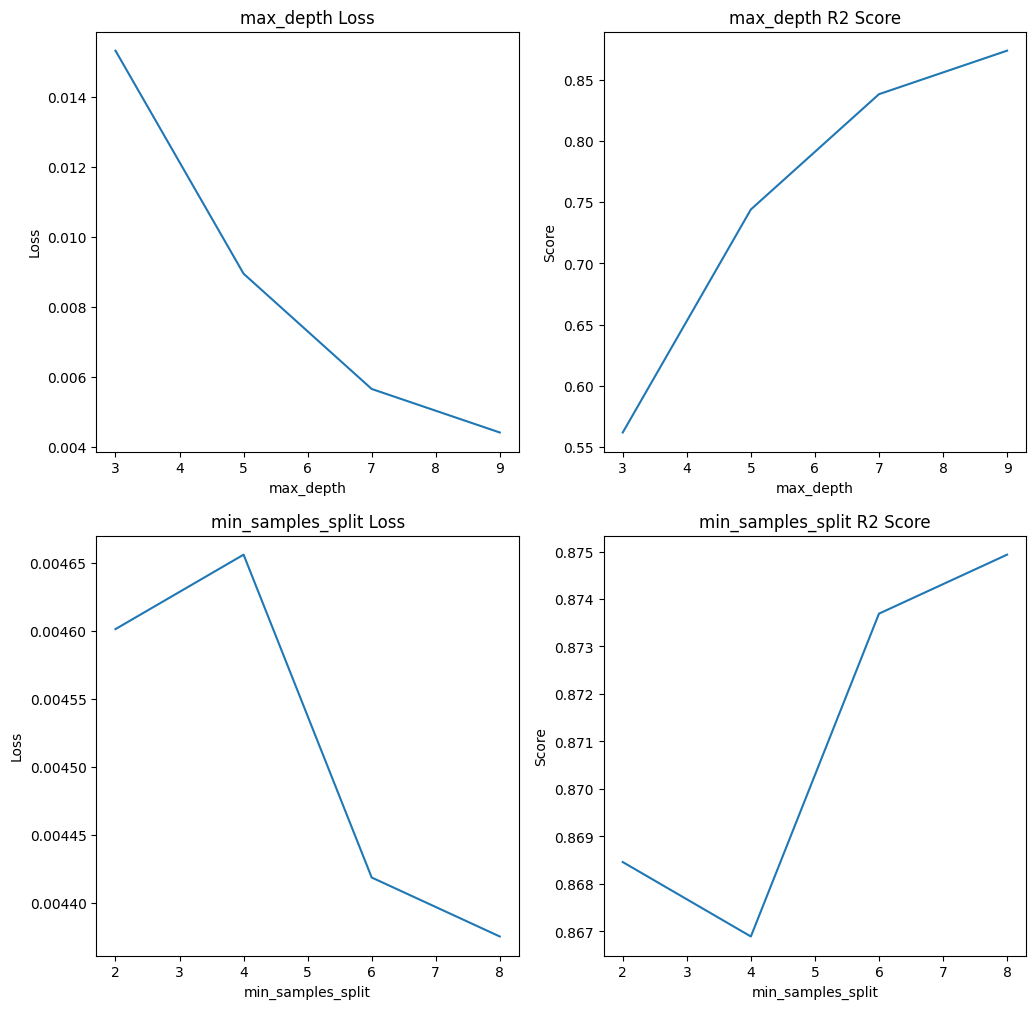

In [116]:
best_params = find_best_params(DecisionTreeRegressor, params, X_train_grid, y_train_grid, X_val, y_val)

In [117]:
best_params

{'max_depth': None, 'min_samples_split': 8, 'random_state': 42}

In [118]:
dt_model = RegressionModel(DecisionTreeRegressor(**best_params), X_train, y_train, X_test, y_test, "Decision Tree")
dt_model.fit_and_predict()
dt_model

Decision Tree:
	Train: MSE: 0.001, R2: 0.977
	Test: MSE: 0.006, R2: 0.827

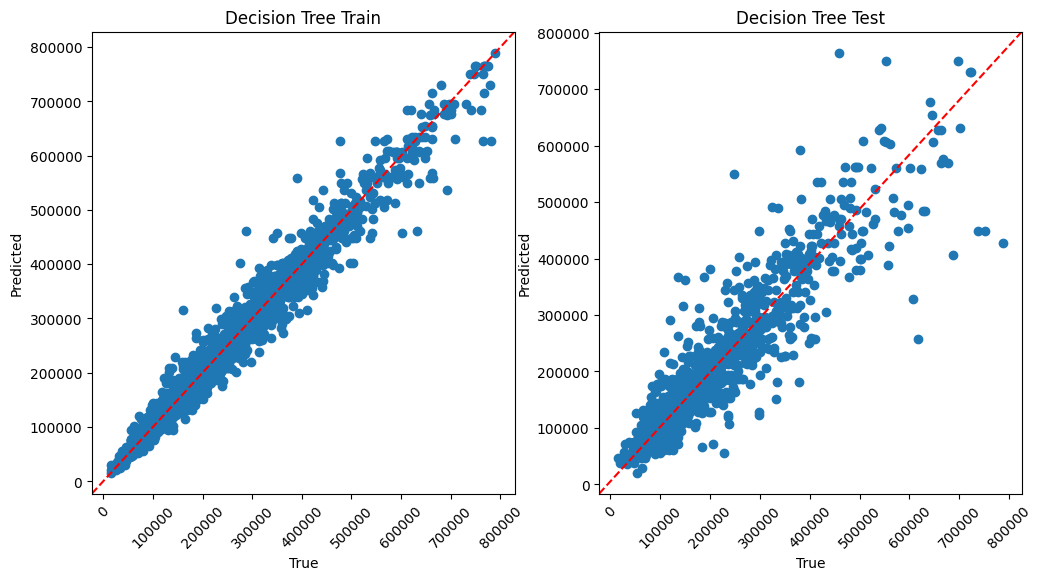

In [119]:
dt_model.reverse_scale(y_scaler)
dt_model.plot()

#### Comparison

Finally, we'll compare the three implemented methods. **Which method performed better? We should our analysis of this comparison.** Note that having 3 models is mandatory for this comparison, and adding more models, based on how this extra information improves the quality of our comparison, has a bonus score.

In [136]:
def print_model_tabulated_results(model: RegressionModel) -> None:
    results = [
        [Fore.YELLOW + "Train" + Fore.RESET, f"{Fore.GREEN if model.train_results.mse < 0.004 else Fore.RED}{model.train_results.mse:.3f}", f"{Fore.GREEN if model.train_results.r2 > 0.9 else Fore.RED}{model.train_results.r2:.3f}{Fore.RESET}"],
        [Fore.YELLOW + "Test" + Fore.RESET, f"{Fore.GREEN if model.test_results.mse < 0.004 else Fore.RED}{model.test_results.mse:.3f}", f"{Fore.GREEN if model.test_results.r2 > 0.9 else Fore.RED}{model.test_results.r2:.3f}{Fore.RESET}"],
    ]
    headers = ["Data", "MSE", "R2"]
    headers = [Fore.CYAN + h + Fore.RESET for h in headers]
    print(tabulate.tabulate(results, headers=headers, tablefmt="pretty"))

In [138]:
def print_all_models_tabulated_results(models: list[RegressionModel]) -> None:
    for model in models:
        print(Fore.BLUE + model.name + Fore.RESET)
        print_model_tabulated_results(model)
        print()

In [140]:
models = [nn_model, lr_model, svm_model, rf_model, gb_model, knn_model, dt_model]
print_all_models_tabulated_results(models)

Neural Network
+-------+-------+-------+
| Data  |  MSE  |  R2   |
+-------+-------+-------+
| Train | 0.002 | 0.928 |
| Test  | 0.004 | 0.869 |
+-------+-------+-------+

Linear Regression
+-------+-------+-------+
| Data  |  MSE  |  R2   |
+-------+-------+-------+
| Train | 0.007 | 0.765 |
| Test  | 0.007 | 0.772 |
+-------+-------+-------+

SVM
+-------+-------+-------+
| Data  |  MSE  |  R2   |
+-------+-------+-------+
| Train | 0.003 | 0.892 |
| Test  | 0.005 | 0.860 |
+-------+-------+-------+

Random Forest
+-------+-------+-------+
| Data  |  MSE  |  R2   |
+-------+-------+-------+
| Train | 0.000 | 0.988 |
| Test  | 0.003 | 0.912 |
+-------+-------+-------+

Gradient Boosting
+-------+-------+-------+
| Data  |  MSE  |  R2   |
+-------+-------+-------+
| Train | 0.001 | 0.980 |
| Test  | 0.002 | 0.932 |
+-------+-------+-------+

KNN
+-------+-------+-------+
| Data  |  MSE  |  R2   |
+-------+-------+-------+
| Train | 0.000 | 1.000 |
| Test  | 0.009 | 0.713 |
+-------+---

Results are presented as follows:

- **Neural Network**: The model performs well on the Train data but it doesn't generalize well on the Test data. The performance of the model on the Test data is not so bad, but it can be improved.
- **Linear Regression**: The model doesn't perform well on the Train data and it doesn't generalize well on the Test data. It shows that the model is underfitting.
- **SVM**: The results are almost the same as the neural network model, while it performs worse on the Train data.
- **Random Forest**: This model performs well on both Train and Test data. It shows that the model is not overfitting or underfitting. It is one of the best models for this dataset and we can use it for further analysis.
- **Gradient Boosting**: This model performs well on both Train and Test data. It shows that the model is not overfitting or underfitting. It is one of the best models for this dataset and we can use it for further analysis.
- **KNN**: This model performs great on the Train data with 100% accuracy. However, it has the worst performance on the Test data. It shows that the model is overfitting.
- **Decision Tree**: This model performs well on the Train data but it doesn't generalize well on the Test data. This shows that the model is overfitting.

### Feature Analysis

We'll train the best-performing method from the previous section using the dimension-reduced data. How did the model performance change? We should provide our analysis.

We'll use the `Random Forest` and `Gradient Boosting` models for this analysis. We'll train the models using the dimension-reduced data and compare the results with the previous models.

#### Random Forest

In [141]:
params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 4, 6, 8],
    "random_state": [RANDOM_STATE]
}

100%|██████████| 60/60 [05:05<00:00,  5.08s/it]


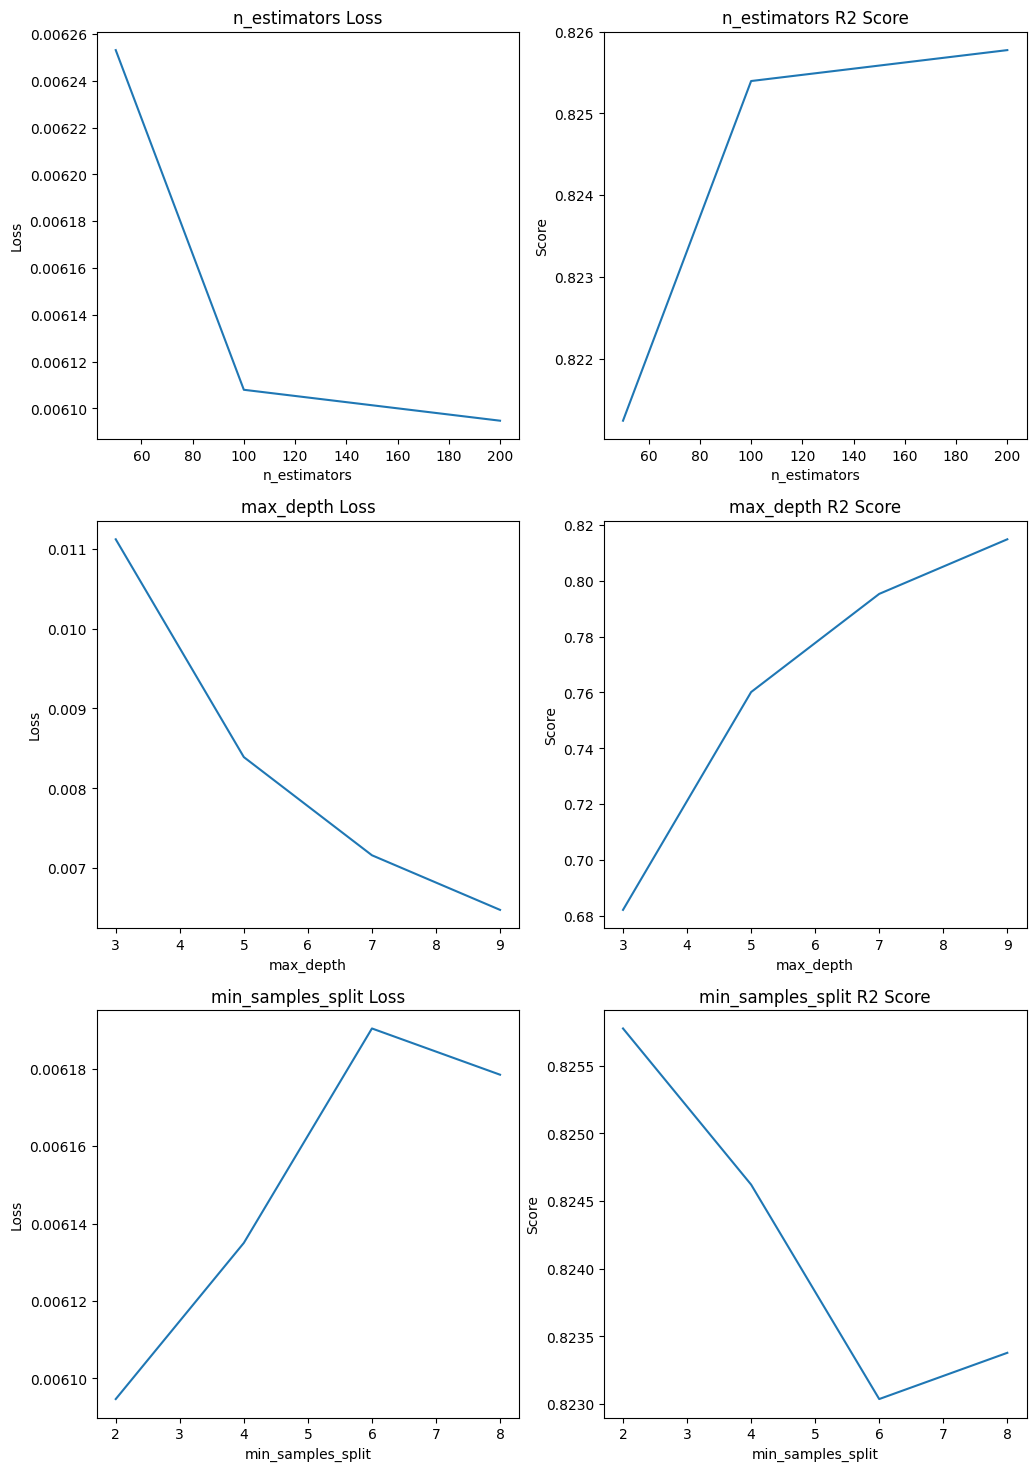

In [142]:
best_params = find_best_params(RandomForestRegressor, params, X_pca_train_grid, y_train_grid, X_pca_val, y_val)

In [143]:
best_params

{'max_depth': None,
 'min_samples_split': 2,
 'n_estimators': 200,
 'random_state': 42}

In [144]:
rf_pca_model = RegressionModel(RandomForestRegressor(**best_params), X_pca_train, y_train, X_pca_test, y_test, "Random Forest PCA")
rf_pca_model.fit_and_predict()
rf_pca_model

Random Forest PCA:
	Train: MSE: 0.001, R2: 0.969
	Test: MSE: 0.008, R2: 0.764

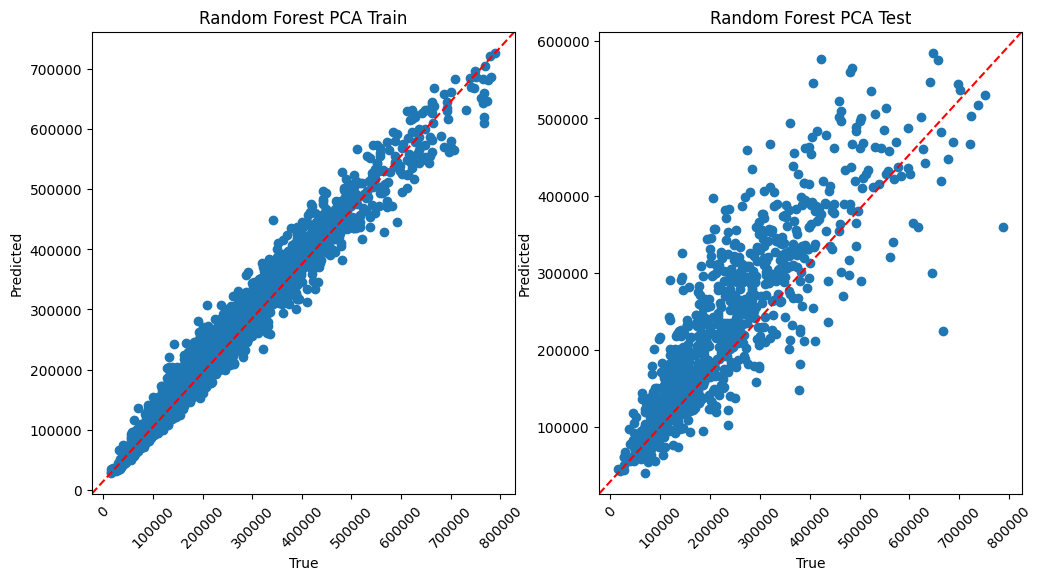

In [145]:
rf_pca_model.reverse_scale(y_scaler)
rf_pca_model.plot()

As we can see, the model performance on the Train data is almost the same as the previous model. However, the model performance on the Test data is worse than the previous model. This shows that the model is overfitting.

#### Gradient Boosting

In [146]:
params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [3, 5, 7, 9, None],
    "min_samples_split": [2, 4, 6, 8],
    "random_state": [RANDOM_STATE]
}

100%|██████████| 60/60 [09:11<00:00,  9.19s/it]


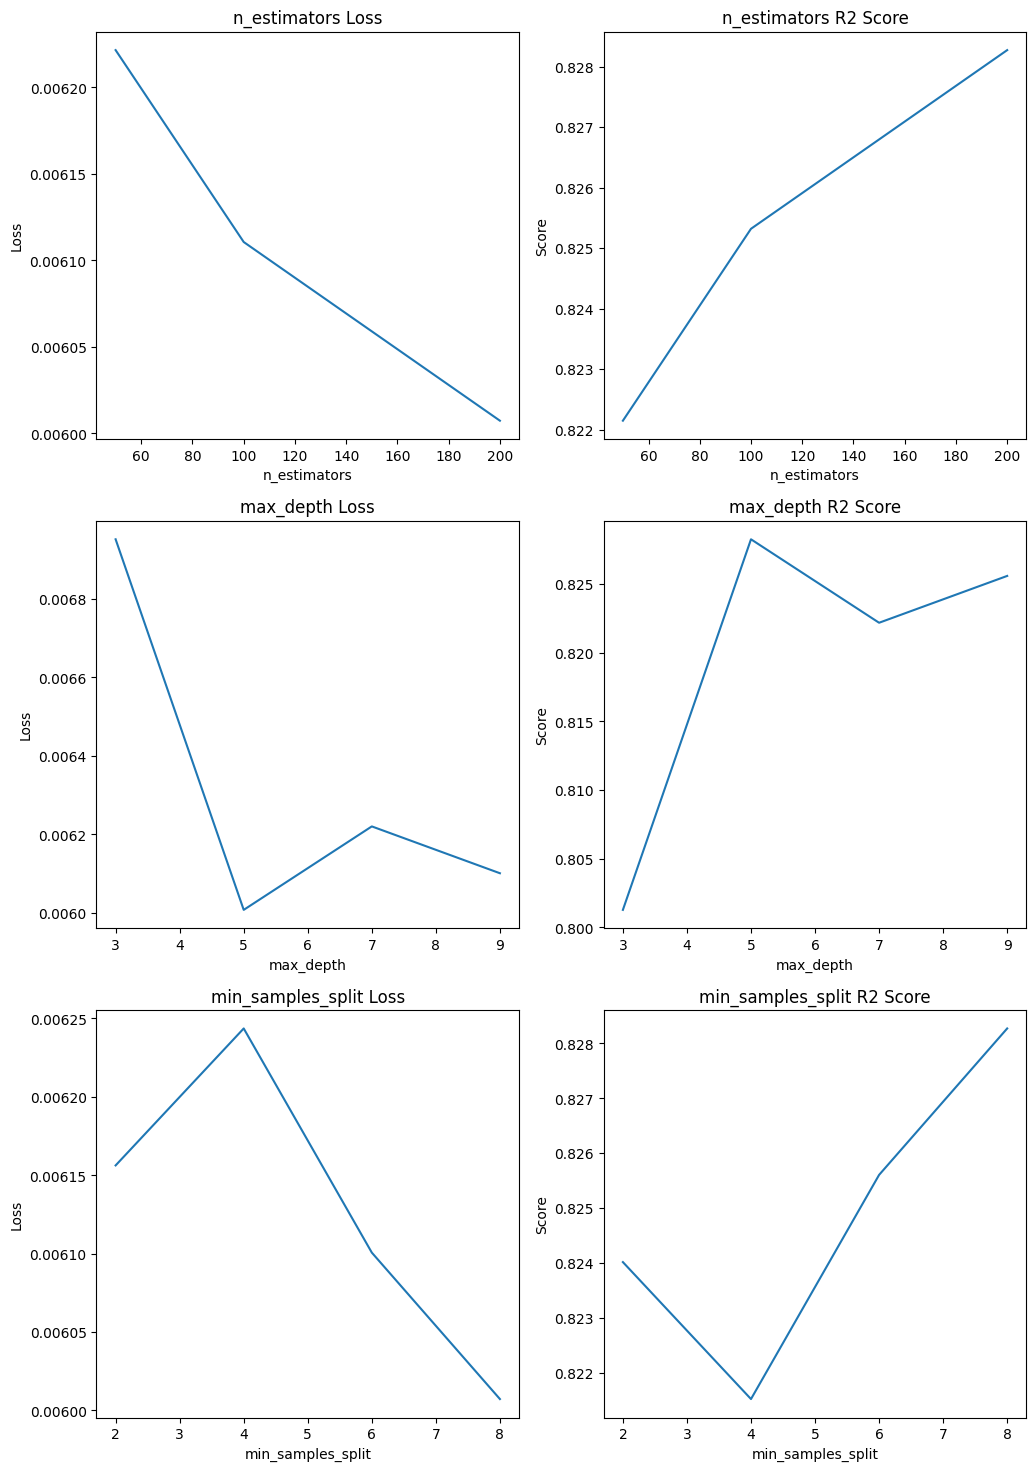

In [147]:
best_params = find_best_params(GradientBoostingRegressor, params, X_pca_train_grid, y_train_grid, X_pca_val, y_val)

In [148]:
best_params

{'max_depth': 5,
 'min_samples_split': 8,
 'n_estimators': 200,
 'random_state': 42}

In [149]:
gb_pca_model = RegressionModel(GradientBoostingRegressor(**best_params), X_pca_train, y_train, X_pca_test, y_test, "Gradient Boosting PCA")
gb_pca_model.fit_and_predict()
gb_pca_model

Gradient Boosting PCA:
	Train: MSE: 0.002, R2: 0.950
	Test: MSE: 0.007, R2: 0.792

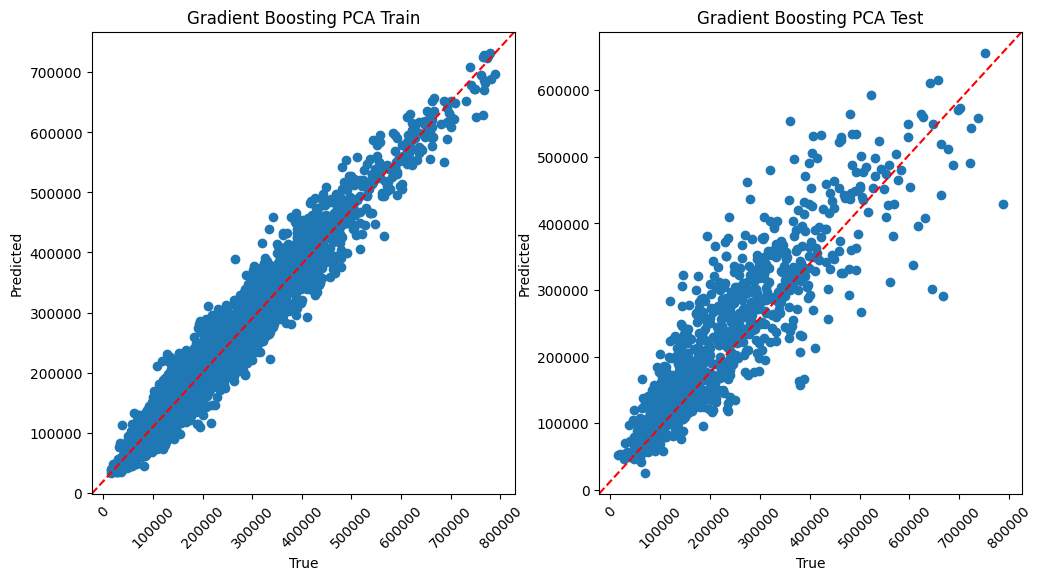

In [150]:
gb_pca_model.reverse_scale(y_scaler)
gb_pca_model.plot()

As we can see, the model performance on the Train data is almost the same as the previous model. However, the model performance on the Test data is worse than the previous model. This shows that the model is overfitting.

#### Comparison

In [151]:
models = [rf_model, rf_pca_model, gb_model, gb_pca_model]
print_all_models_tabulated_results(models)

Random Forest
+-------+-------+-------+
| Data  |  MSE  |  R2   |
+-------+-------+-------+
| Train | 0.000 | 0.988 |
| Test  | 0.003 | 0.912 |
+-------+-------+-------+

Random Forest PCA
+-------+-------+-------+
| Data  |  MSE  |  R2   |
+-------+-------+-------+
| Train | 0.001 | 0.969 |
| Test  | 0.008 | 0.764 |
+-------+-------+-------+

Gradient Boosting
+-------+-------+-------+
| Data  |  MSE  |  R2   |
+-------+-------+-------+
| Train | 0.001 | 0.980 |
| Test  | 0.002 | 0.932 |
+-------+-------+-------+

Gradient Boosting PCA
+-------+-------+-------+
| Data  |  MSE  |  R2   |
+-------+-------+-------+
| Train | 0.002 | 0.950 |
| Test  | 0.007 | 0.792 |
+-------+-------+-------+



### Overall Report and Discussions

This is the last step of our project! We will provide a brief report about our main steps from phase 0 till the end of this phase. We don’t want detailed information in this report; only mentioning key decisions and ideas is enough. This will show the roadmap of our project. Also we should mention the problems and challenges we faced and our solutions for them, along with some alternatives.

## References